# Ternary plots in Python with `ternary`

We'd like to try making ternary plots in Python. We'll use [`python-ternary`](https://github.com/marcharper/python-ternary). I'm following [the examples](https://github.com/marcharper/python-ternary/blob/master/examples/Ternary-Examples.ipynb) from the GitHub repo.

The `ternary` package can be installed with:

    pip install python-ternary
    
After doing that, check it worked:

In [1]:
import ternary

## Make random points

We'll make some random points for the ternary diagram.

In [2]:
import random

def random_points(num_points=25, scale=40):
    points = []
    for i in range(num_points):
        x = random.randint(1, scale)
        y = random.randint(0, scale - x)
        z = scale - x - y
        points.append((x,y,z))
    return points

In [168]:
scale = 100
points = random_points(scale=scale)
points[:10]

[(47, 1, 52),
 (12, 38, 50),
 (26, 69, 5),
 (75, 3, 22),
 (55, 27, 18),
 (43, 42, 15),
 (9, 56, 35),
 (53, 24, 23),
 (69, 20, 11),
 (28, 55, 17)]

## Fiddle with plot shape

By default the plots are a little too narrowso you have to guess the correct width and height. But we can maybe make it a little easier by computing it. The factor is empirical.

In [253]:
import math
from collections import namedtuple
from typing import NamedTuple

def get_plot_shape(width:float=None, height:float=None) -> NamedTuple:
    """
    Helper function to get correctly shaped ternaries.
    Get size of plot in inches, given at least one of
    width or height. If you give neither, I'll assume
    you want a width of 10 inches. If you give both,
    I'll use width and ignore the height.
    
    One way to use it is like:
    
        fig, tax = ternary.figure(scale=scale)
        fig.set_size_inches(*get_plot_size())
        
    Args:
        width (float): Optional width of plot. Defaults
            to 10 inches.
        height (float): Optional height of plot. Ignored
            if width is also provided.
    
    Returns:
        NamedTuple: The plot (width, height).
    
    Examples
    >>> w, h = get_plot_shape(height=10)
    >>> print(f"width: {w:.2f}, height: {h:.2f}")
    width: 10.79, height: 10.00
    """
    # Derived from theory and experiment...
    f = math.sin(math.radians(60)) * 1.07
    
    if (width is None) and (height is None):
        width = 10
    elif width is None:
        width = height / f
    if height is None:
        height = width * f

    shape = namedtuple('Shape', ['width', 'height'])
    return shape(width, height)

import doctest
doctest.testmod()

TestResults(failed=0, attempted=4)

In [246]:
# Example
w, h = get_plot_shape()
print(f"width: {w:.2f}, height: {h:.2f}")

width: 10.00, height: 9.27


## Super-minimal scatter plot example

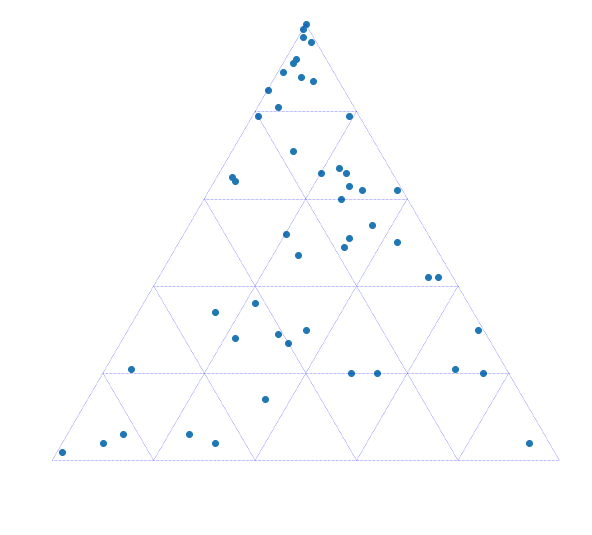

In [248]:
fig, tax = ternary.figure(scale=scale)
fig.set_size_inches(*get_plot_shape())

tax.scatter(points)
tax.gridlines(multiple=20, color="blue")
tax.get_axes().axis('off')

tax.show()

## Slight more decorated example

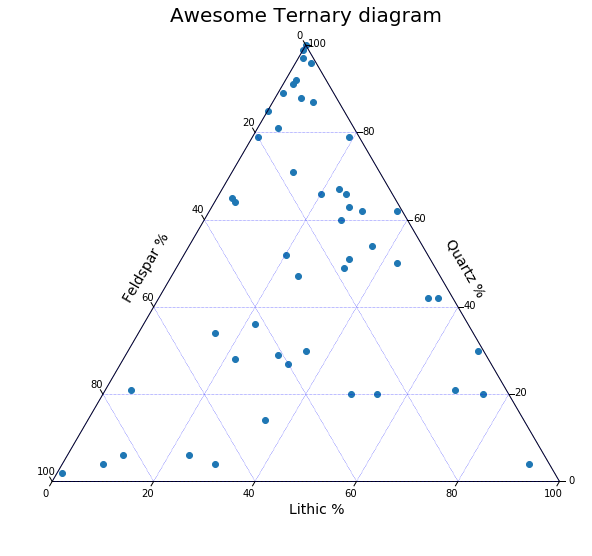

In [252]:
fig, tax = ternary.figure(scale=scale)
fig.set_size_inches(*get_plot_shape())

# Plot points.
tax.scatter(points)

# Axis labels. (See below for corner labels.)
fontsize = 14
offset = 0.08
tax.left_axis_label("Feldspar %", fontsize=fontsize, offset=offset)
tax.right_axis_label("Quartz %", fontsize=fontsize, offset=offset)
tax.bottom_axis_label("Lithic %", fontsize=fontsize, offset=-offset)
tax.set_title("Awesome Ternary diagram", fontsize=20)

# Decoration.
tax.boundary(linewidth=1)
tax.gridlines(multiple=20, color="blue")
tax.ticks(axis='lbr', linewidth=1, multiple=20)
tax.get_axes().axis('off')

tax.show()

## Even more involved example, using `pandas`

Make some fake data in a `DataFrame:

In [220]:
import pandas as pd

scale = 100
df_A = pd.DataFrame([("Albania",) + p for p in random_points(50, scale=scale)], columns=['Set', 'Q', 'F', 'L'])
df_B = pd.DataFrame([("Zimbabwe",) + p for p in random_points(50, scale=scale)], columns=['Set', 'Q', 'F', 'L'])

df = df_A.append(df_B, ignore_index=True)

df.head()

,Set,Q,F,L
0,Albania,30,40,30
1,Albania,57,22,21
2,Albania,81,14,5
3,Albania,96,0,4
4,Albania,75,17,8


Now we can make a plot:

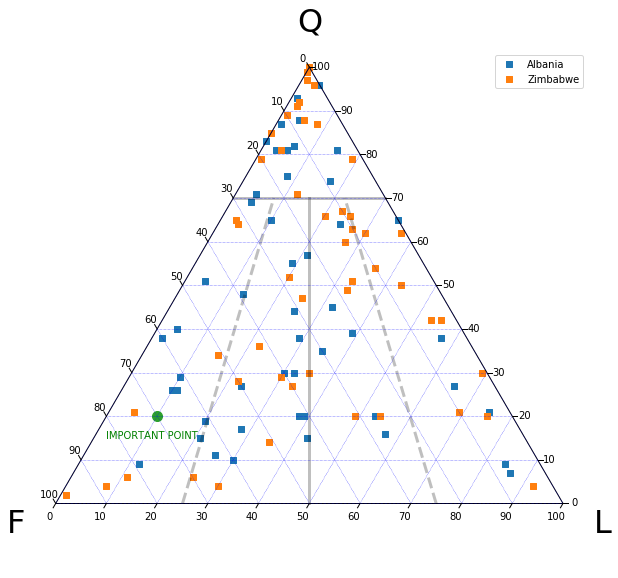

In [254]:
fig, tax = ternary.figure(scale=scale)
fig.set_size_inches(*get_plot_shape())

# Plot the points in groups.
for name, group in df.groupby('Set'):
    
    # Note that we have to shuffle the order.
    # This will place Q at the top, F on the left.
    # So the column order is: right, top, left.
    points = group[['L', 'Q', 'F']].values
    tax.scatter(points, marker='s', label=name)

tax.scatter([[10, 20, 70]], marker='o', s=100)
tax.get_axes().text(10, 13, "IMPORTANT POINT", color='green')

# Draw some lines
p1 = (50, 0, 50)
p2 = (15, 70, 15)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.25, linestyle="-")

p1 = (25, 0, 75)
p2 = (8, 70, 22)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.25, linestyle="--")

p1 = (75, 0, 25)
p2 = (22, 70, 8)
tax.line(p1, p2, linewidth=3, color='k', alpha=0.25, linestyle="--")

tax.horizontal_line(70, linewidth=3, color='k', alpha=0.25, linestyle="-")

# Corner labels.
fontsize = 32
offset = 0.1
tax.top_corner_label("Q", fontsize=fontsize, offset=0.2)
tax.left_corner_label("F", fontsize=fontsize, offset=offset)
tax.right_corner_label("L", fontsize=fontsize, offset=offset)

# Decorations.
tax.legend()
tax.boundary(linewidth=1)
tax.gridlines(multiple=10, color="blue")
tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.get_axes().axis('off')

tax.show()


-----
&copy; 2019 Agile Scientific, licensed CC-BY, please share this work